# Processamento de Linguagem Natural aplicada à Gestão Pública

Aula 3 (06/06): Texto enquanto dados: métodos para análise

# Conversão de palavras e documentos em números

Métodos matemáticos, estatísticos e computacionais aplicam-se, de forma geral, a números.

Para realizar estas operações e aplicar métodos estatísticos a textos, vamos estudar forma de converter palavras e textos em números.

# Bag of Words

O site da [ALMG](https://www.almg.gov.br/) publica uma série de informações sobre proposições e normas.
Dentre as informações disponíveis constam as ementas e textos.

Um exemplo:


*   https://www.almg.gov.br/atividade_parlamentar/tramitacao_projetos/interna.html?a=2021&n=3042&t=PL&aba=js_tabVisao
*   https://www.almg.gov.br/consulte/legislacao/completa/completa.html?ano=2021&num=24030&tipo=LEI



O [Portal de Dados Abertos da ALMG](http://dadosabertos.almg.gov.br) disponibiliza APIs a partir das quais é possível obter essas informações programaticamente. 




*   http://dadosabertos.almg.gov.br/ws/proposicoes/PL/3042/2021?formato=json
*   http://dadosabertos.almg.gov.br/ws/proposicoes/PL/3042/2021/textos?formato=json



Os dados a seguir foram obtidos desse portal.

In [ ]:
!pip install spacy==3.3.0

In [ ]:
!git clone https://github.com/samuelbarbosaa/oficina_nlp.git

In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
textos_proposicoes = pd.read_excel("/content/drive/MyDrive/oficina_nlp/data_raw/textos.xlsx", index_col=0)

In [ ]:
textos_proposicoes = textos_proposicoes.set_index(['siglaTipoProjeto', 'numero', 'ano'])
textos_proposicoes

texto_padr
siglaTipoProjeto numero ano                                                    
PL               502    1999  PROJETO DE LEI Nº 502/99 Autoriza o Poder Exec...
                 2126   2002  PROJETO DE LEI Nº 2.126/2002 Altera dispositiv...
                 2127   2002  PROJETO DE LEI Nº 2.127/2002 Altera a redação ...
                 120    2003  PROJETO DE LEI Nº 120/2003 (EX-PROJETO DE LEI ...
                 1519   2004  PROJETO DE LEI Nº 1.519/2004 Dispõe sobre a gr...
...                                                                         ...
                 3614   2022  # Projeto de Lei nº 3.614/2022\n\nAutoriza o P...
PEC              81     2022  # Proposta de Emenda à Constituição nº 81/2022...
PL               3622   2022  # Projeto de Lei nº 3.622/2022\n\nDeclara de u...
                 3624   2022  # Projeto de Lei nº 3.624/2022\n\nDá denominaç...
                 3625   2022  # Projeto de Lei nº 3.625/2022\n\nAutoriza o P...

[4534 rows x 1 columns]

In [ ]:
txt_exemplo = ("PL", 2385, 2021)
print(textos_proposicoes.loc[txt_exemplo, "texto_padr"])

# Projeto de Lei nº 2.385/2021

Dispõe sobre a isenção do pagamento da Taxa de Renovação de Licenciamento
Anual de Veículo (TRLAV).

A Assembleia Legislativa do Estado de Minas Gerais decreta:

Art. 1º - Fica o contribuinte do Estado isento do pagamento da Taxa de
Renovação de Licenciamento Anual de Veículo (TRLAV).

Art. 2º - Esta lei entra em vigor na data de sua publicação.

Sala das Reuniões, 4 de janeiro de 2021.

Cleitinho Azevedo (Cidadania)

**Justificação:** O presente projeto tem o objetivo de suprimir a cobrança de
Taxa de Renovação do Licenciamento Anual do Veículo (TRLAV), tendo em vista a
substituição do Certificado de Registro e Licenciamento de Veículo - CRLV,
documento em meio físico, pela sua versão digital, conforme previsto na
Deliberação do CONTRAN nº 180 de 30 de dezembro de 2019, que previu os
requisitos para a emissão do Certificado de Registro e Licenciamento de
Veículo Eletrônico \- CRLV-e.

Como o proprietário do veículo não receberá mais a versão impressa, p

# Pré-processamento dos textos

Os textos estão recheados de termos e caracteres que usualmente não são de interesse na análise. No nosso caso não estamos interessados em números, símbolos (#\?.,;ºª\n etc) e outros caracteres especiais que removeremos no pré-processamento do texto. Também removeremos as chamadas "*stopwords*".

In [ ]:
import spacy

nlp = spacy.load("/content/drive/MyDrive/oficina_nlp/models")

In [ ]:
import nltk
import string
import re
from spacy.lang.pt import STOP_WORDS as spacy_stopwords
from functools import reduce

nltk.download('stopwords')
nltk_stopwords = nltk.corpus.stopwords.words("portuguese")
all_sw = list(spacy_stopwords) + nltk_stopwords


def remove_pontuacao(x):
    punct = [s for s in string.punctuation] + ["º"]
    return reduce(lambda w, s: w.replace(s, ""), punct, x)


def remove_stopwords(x):
    palavras = x.split(" ")
    return " ".join([w for w in palavras if w.lower() not in all_sw])


def remove_espacos_extras(x):
    return re.sub(r"\s+", " ", x)


def remove_ngram(x, n):
    palavras = x.split(" ")
    return " ".join([w for w in palavras if not len(w) <= n])

def lemmatizar(x):
  doc = nlp(x)
  return " ".join([token.lemma_ for token in doc])

def padronizar_texto(x):
    y = re.sub(pattern=r"\W", repl=" ", string=x)
    y = re.sub(pattern=r"\d", repl="", string=y)
    y = re.sub(pattern=r"\n\r+", repl="", string=y)
    y = remove_pontuacao(y)
    y = remove_stopwords(y)
    y = remove_espacos_extras(y)
    y = remove_ngram(y, 2)
    y = lemmatizar(y)
    return y.lower()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#textos_proposicoes["texto"] = textos_proposicoes["texto_padr"]
#textos_proposicoes["texto_padr"] = textos_proposicoes["texto"].apply(padronizar_texto)

#with open('/content/drive/MyDrive/oficina_nlp/data/textos_padronizados.pkl', 'wb') as fp:
#  pickle.dump(textos_proposicoes, fp)

with open('/content/drive/MyDrive/oficina_nlp/data/textos_padronizados.pkl', 'rb') as fp:
  textos_proposicoes = pickle.load(fp)

textos_proposicoes

texto_padr  \
siglaTipoProjeto numero ano                                                       
PL               502    1999  projeto lei autorizar executivo criar concessã...   
                 2126   2002  projeto lei altera dispositivo lei dezembro co...   
                 2127   2002  projeto lei altera redação art lei dezembro di...   
                 120    2003  projeto lei projeto lei institui medalha mérit...   
                 1519   2004  projeto lei dispor gratuidade tranporte coleti...   
...                                                                         ...   
                 3614   2022  projeto lei autorizar executivo doar município...   
PEC              81     2022  proposta emenda constituição acrescentar art i...   
PL               3622   2022  projeto lei declara utilidade público institut...   
                 3624   2022  projeto lei denominação viaduto localizar alça...   
                 3625   2022  projeto lei autorizar executivo doar município...   

                                                                          texto  
siglaTipoProjeto numero ano                                                      
PL               502    1999  PROJETO DE LEI Nº 502/99 Autoriza o Poder Exec...  
                 2126   2002  PROJETO DE LEI Nº 2.126/2002 Altera dispositiv...  
                 2127   2002  PROJETO DE LEI Nº 2.127/2002 Altera a redação ...  
                 120    2003  PROJETO DE LEI Nº 120/2003 (EX-PROJETO DE LEI ...  
                 1519   2004  PROJETO DE LEI Nº 1.519/2004 Dispõe sobre a gr...  
...                                                                         ...  
                 3614   2022  # Projeto de Lei nº 3.614/2022\n\nAutoriza o P...  
PEC              81     2022  # Proposta de Emenda à Constituição nº 81/2022...  
PL               3622   2022  # Projeto de Lei nº 3.622/2022\n\nDeclara de u...  
                 3624   2022  # Projeto de Lei nº 3.624/2022\n\nDá denominaç...  
                 3625   2022  # Projeto de Lei nº 3.625/2022\n\nAutoriza o P...  

[4534 rows x 2 columns]

# Frequência de termos e de documentos

---

**Como podemos fazer inferência e análise (estatística) sobre os textos, e obter eventuais conclusões desejadas sem precisar ler as 4.534 proposições?**

---

Não podemos tirar médias, somar, subtrair, dividir ou multiplicar as informações em textos, nem aplicar métodos como regressão linear. Para isso precisaríamos produzir números a partir dos textos. Uma forma básica de gerá-los são as contagens de frequência.

Podemos contar, por exemplo, quantas vezes a palavra "lei" e a palavra "isenção" aparecem.

In [ ]:
textos_proposicoes["texto_padr"].str.count("lei").sum()

33825

In [ ]:
textos_proposicoes["texto_padr"].str.count("isenção").sum()

429

Outra frequência interessante é a de **número de textos** que em que as palavras "lei" e "isenção" constam:

In [ ]:
textos_proposicoes["texto_padr"].str.contains("lei").sum()

4534

In [ ]:
textos_proposicoes["texto_padr"].str.contains("isenção").sum()

185

> Com base em frequências desse tipo, como poderíamos medir a "importância" de uma palavra em um texto?

In [ ]:
print(textos_proposicoes.loc[txt_exemplo]["texto"])

# Projeto de Lei nº 2.385/2021

Dispõe sobre a isenção do pagamento da Taxa de Renovação de Licenciamento
Anual de Veículo (TRLAV).

A Assembleia Legislativa do Estado de Minas Gerais decreta:

Art. 1º - Fica o contribuinte do Estado isento do pagamento da Taxa de
Renovação de Licenciamento Anual de Veículo (TRLAV).

Art. 2º - Esta lei entra em vigor na data de sua publicação.

Sala das Reuniões, 4 de janeiro de 2021.

Cleitinho Azevedo (Cidadania)

**Justificação:** O presente projeto tem o objetivo de suprimir a cobrança de
Taxa de Renovação do Licenciamento Anual do Veículo (TRLAV), tendo em vista a
substituição do Certificado de Registro e Licenciamento de Veículo - CRLV,
documento em meio físico, pela sua versão digital, conforme previsto na
Deliberação do CONTRAN nº 180 de 30 de dezembro de 2019, que previu os
requisitos para a emissão do Certificado de Registro e Licenciamento de
Veículo Eletrônico \- CRLV-e.

Como o proprietário do veículo não receberá mais a versão impressa, p

In [ ]:
textos_proposicoes.loc[txt_exemplo][["texto_padr"]].str.count("isenção")

texto_padr    1
Name: (PL, 2385, 2021), dtype: int64

In [ ]:
textos_proposicoes.loc[txt_exemplo][["texto_padr"]].str.count("lei")

texto_padr    5
Name: (PL, 2385, 2021), dtype: int64

Embora a palavra "lei" apareça mais vezes na proposição em questão, é evidente que a palavra "isenção" tem mais "importância".

Uma forma de relativizar a importância é dividir a frequência da palavra pelo número de documentos em que aparecem.

Dessa forma, o número de vezes que a palavra aparece no documento aumenta "importância" da palavra, mas o número total de documentos em que a palavra aparece reduz, diminuindo a "importância" de palavras muito recorrentes.

$$I = \frac{f}{N}$$

In [ ]:
I1 = textos_proposicoes.loc[txt_exemplo][["texto_padr"]].str.count("isenção") / textos_proposicoes["texto_padr"].str.contains("isenção").sum()
I2 = textos_proposicoes.loc[txt_exemplo][["texto_padr"]].str.count("lei") / textos_proposicoes["texto_padr"].str.contains("lei").sum()
print(f"Importância da palavra 'isenção': {I1[0]:.3f}.")
print(f"Importância da palavra 'lei': {I2[0]:.3f}.")
print(f"Razão I1/I2: {I1[0]/I2[0]:.2f}.")

Importância da palavra 'isenção': 0.005.
Importância da palavra 'lei': 0.001.
Razão I1/I2: 4.90.


A medida de "importância" $I$ é da palavra "isenção", que aparece apenas uma vez no texto, é quase cinco vezes maior do que a da palavra "lei", que aparece cinco vezes no documento em questão; Uma forma modificada de cálculo do $I$ é denomidada "TF-IDF" (*Term-Frequency Inverse-Document-Frequency).


A frequência da palavra é denominada "*Term Frequency*" na literatura, e o número de textos em que ocorre "*Document Frequency*".

# A Matriz DTM (*Document-Term Matrix*)

Podemos estender essa contagem para todos os termos e documentos do *Corpus* (conjunto de documentos sob análise) através da *tokenização* seguida de operações de contagem.

Vamos tomar como exemplo os seguintes documentos:

Documento	| Ementa
----------| -----------------
PL 4182 2017 |	Dispõe sobre a obrigação das empresas concessionárias de rodovias em atividade no Estado de Minas Gerais de realizar o resgate e a assistência de emergência de animais acidentados nas rodovias e nas estradas por elas administradas e dá outras providências.
PL 78 2019	| Dispõe sobre a implantação de ecodutos que possibilitem a segura transposição da fauna, sob ou sobre estradas, rodovias e ferrovias no Estado.
PL 3325 2016	| Dispõe sobre a Política Estadual de Incentivo à Doação de Sangue.
PL 2140 2020	| Declara a utilidade pública a Associação dos Doadores de Sangue de Araxá, com sede no Município de Araxá.


Se realizarmos a leitura das ementas percebemos que o PL 4182 é similar ao PL 78 2019, e o PL 3325 2016, por sua vez, similar ao PL 2140 2020.



Se considerarmos, a título de exemplo, somente a contagem dos termos "dispõe", "rodovias", "animais" e "sangue", obtemos a seguinte matriz:

Documento	| dispõe	| rodovias |	animais	| sangue
----------|---------|----------|----------|--------
PL 4182 2017	| 1	| 2	| 1	| 0
PL   78 2019	| 1	| 1	| 0	| 0
PL 3325 2016	| 1	| 0	| 0	| 1
PL 2140 2020	| 0	| 0	| 0	| 1


Observe que cada documento corresponde a um **vetor** linha nesta representação da Matriz DTM. 

Desta forma, todas as operações de álgebra linear (usadas o tempo todo na análise estatística) e métodos estatísticos podem ser aplicadas aos documentos. Exemplos: regressão, análise fatorial, redução de dimensionalidade, agrupamento ("*clusterização*"), etc.

> Vale observar que, neste método, somente a frequência das palavras em cada documento importa, sendo irrelevante a ordem em que aparecem. Por este motivo, métodos desta natureza são conhecidos como **Bag of Words** (BoW). É evidente que a linguagem natural tem natureza estritamente sequencial (a ordem importa), de modo que o método certamente terá limitações. Porém, para muitas aplicações, as informações obtidas com o *Bag of Words* é suficiente, como veremos a seguir.

Comparando as **linhas** da matriz, é razoável dizer que as linhas 1 e 2 são mais similares, entre si, do que as linhas 1 e 4, por exemplo. Porém como o termo "dispõe" aparece nos três primeiros documentos mas não no último, poderíamos concluir, considerando apenas os dados na matriz, que as linhas 2 e 3 são tão similares quanto as linhas 3 e 4. Desta forma, a matriz DTM carrega a mesma limitação da análise simples de frequência dos termos. Para contornar essa limitação iremos calcular a matriz TF-IDF na próxima seção.


Vale notar, ainda, que cada termo é um **vetor** coluna na matriz DTM. Observe que a mesma análise de similaridade pode ser feita entre as colunas. Nesse sentido, os termos são similares se tendem a ocorrer nos mesmos documentos.

Vamos obter a matriz TF do conjunto de textos que importamos usando o pacote *scikit-learn (sklearn)*.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
modelo = cv.fit(textos_proposicoes["texto_padr"])
DS = modelo.transform(textos_proposicoes["texto_padr"])
DS

<4534x31297 sparse matrix of type '<class 'numpy.int64'>'
	with 754323 stored elements in Compressed Sparse Row format>

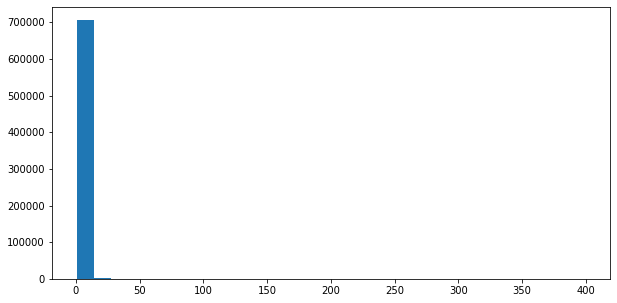

In [ ]:
D = np.triu(DS.toarray()).flatten()
D = D[D>0]
plt.hist(D, bins=30)
plt.show()

In [ ]:
tokens = modelo.get_feature_names_out()
tokens[slice(200, 210)]

array(['abstratamente', 'abstrato', 'abstração', 'abstraír', 'absurda',
       'absurdamente', 'absurdo', 'abto', 'abundam', 'abundante'],
      dtype=object)

Nesse caso, temos uma matriz de 4.534 linhas (correspondentes aos documentos) e 31.297 colunas (correspondentes aos *tokens* ou "palavras"). Assim, cada documento é representado por uma lista de 31.297 números (vetor 31.297-dimensional).

A maioria das entradas dessa matriz é igual a zero pois a maior parte das palavras constam em apenas alguns documentos. Matrizes com essa propriedade são chamadas de *matrizes esparsas*. Essa característica impõe algumas limitações sobre as análises que veremos adiante.

Importante reiterar que as análises realizadas diretamente com essa matriz sofrerão da mesma limitação do uso de frequências simples de palavras se comparadas a uma medida de "importância". Desta forma vamos estudar e analisar a matriz TF-IDF, cujas entradas correspondem ao cálculo da "importância" de cada termo em cada documento.

# A Matriz TF-IDF (*Term-Frequency Inverse-Document-Frequency*)

O pacote `sklearn` permite obter também a Matriz TF-IDF, que corresponde (com algumas alterações) à matriz DTM com entradas de cada termo divididas pela contagem do número de documentos em que aparece no *corpus*.

Nesse caso, documentos serão similares se tiverem a mesma distribuição de importância relativa dos termos (e termos serão similares se tiverem a mesma distribuição de importância relativa entre documentos).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

V = TfidfVectorizer()
V_fit = V.fit(textos_proposicoes["texto_padr"])
TF_IDF = V_fit.transform(textos_proposicoes["texto_padr"])

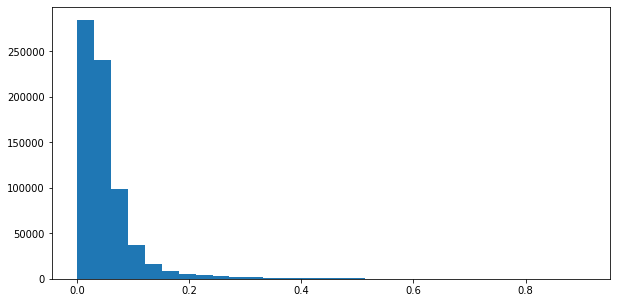

In [ ]:
TF_IDF_D = np.triu(TF_IDF.toarray()).flatten()
TF_IDF_D = TF_IDF_D[TF_IDF_D>0]
plt.hist(TF_IDF_D, bins=30)
plt.show()

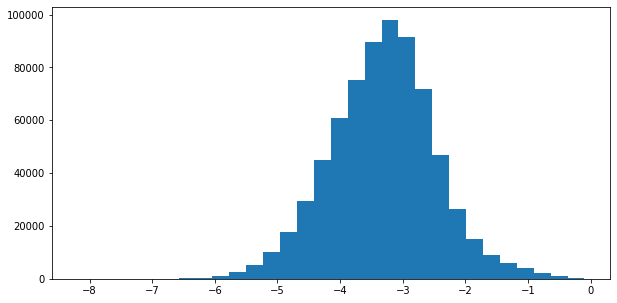

In [ ]:
plt.hist(np.log(TF_IDF_D), bins=30)
plt.show()

Observe que a a TF-IDF tem uma distribuição mais informativa, em termos estatísticos, do que a DTM.